# Exploring Linear Regression

In this task, your will explore linear regression.


In [1]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Create Synthetic Data.
This returns X training data and y labels.  

* Experiment with the **`noise`** keyword argument to see how it affects the graph below, after you are done experimenting, set `noise=20`.
* Experiment with the **`random_state`** variable to get different sets of data

(array([[ 0.50288142],
        [-1.11792545],
        [ 0.04153939],
        [-0.84174737],
        [-0.63765501],
        [ 1.64027081],
        [-0.23618403],
        [ 0.55145404],
        [-0.74787095],
        [-1.18761229],
        [-0.15643417],
        [-0.98877905],
        [-2.1361961 ],
        [-0.0191305 ],
        [-0.05626683],
        [-0.1534952 ],
        [-0.90900761],
        [ 0.53905832],
        [-1.42121723],
        [-0.33882197],
        [-1.05795222],
        [-0.41675785],
        [-1.79343559],
        [ 1.17500122],
        [ 0.25657045],
        [ 0.00902525],
        [-0.87810789],
        [-0.5961597 ],
        [ 2.29220801],
        [-1.24528809]]),
 array([  52.19256926,  -41.27587908,    6.56319171,  -48.33403962,
         -36.85281872,   95.25974781,   -7.76590679,    1.54113544,
         -53.73200186, -134.44545895,    0.77788347,  -80.20728987,
        -111.40246508,   -5.62964147,  -73.43965136,  -26.85848583,
         -96.25347687,   35.70043441

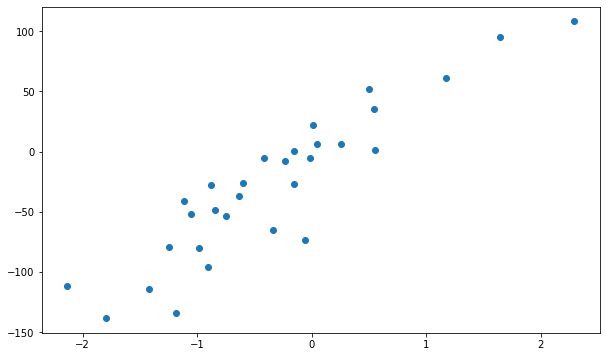

In [2]:
X, y = make_regression(n_samples=30, n_features=1, noise = 20, random_state = 2)
# X and y are of type ndarray
plt.figure(figsize=(10,6))
plt.scatter(X, y);
X, y

In [3]:
#create testing data to plot our prediction onto later - 
# this code is how we "plot a line !!" we need data to create the line
X_test = np.linspace(min(X),max(X),100)
X_test

array([[-2.1361961 ],
       [-2.09146474],
       [-2.04673339],
       [-2.00200203],
       [-1.95727068],
       [-1.91253932],
       [-1.86780797],
       [-1.82307661],
       [-1.77834526],
       [-1.7336139 ],
       [-1.68888255],
       [-1.64415119],
       [-1.59941984],
       [-1.55468849],
       [-1.50995713],
       [-1.46522578],
       [-1.42049442],
       [-1.37576307],
       [-1.33103171],
       [-1.28630036],
       [-1.241569  ],
       [-1.19683765],
       [-1.15210629],
       [-1.10737494],
       [-1.06264358],
       [-1.01791223],
       [-0.97318088],
       [-0.92844952],
       [-0.88371817],
       [-0.83898681],
       [-0.79425546],
       [-0.7495241 ],
       [-0.70479275],
       [-0.66006139],
       [-0.61533004],
       [-0.57059868],
       [-0.52586733],
       [-0.48113597],
       [-0.43640462],
       [-0.39167327],
       [-0.34694191],
       [-0.30221056],
       [-0.2574792 ],
       [-0.21274785],
       [-0.16801649],
       [-0

In [4]:
# code to plot your guess
def plot_your_guess (m , c):
    y_plot = m * X_test +c
    y_pred = m * X + c

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test, y_plot, color = 'teal') # why was .flatter() needed in the code earlier
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(y_pred, y)));

# Let's plot your own personal guess for the best line

Fill out the `m` and `c` parameters for the above function and we'll plot it onto a graph, including checking its mean squared error.  We will later see how your eyes compare with the computers best guess

Feel free to use new code cells to create more plots


# TODO:
## I want to plot the cost function as well and show them how "where" we are on the cost function with each guess"


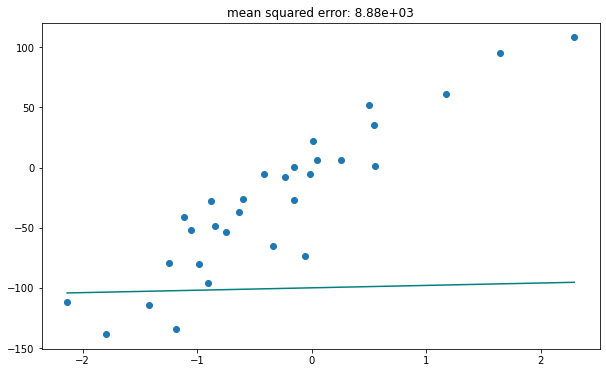

In [5]:
# You plug in m and c below
plot_your_guess(m = 2 , c = -100 )

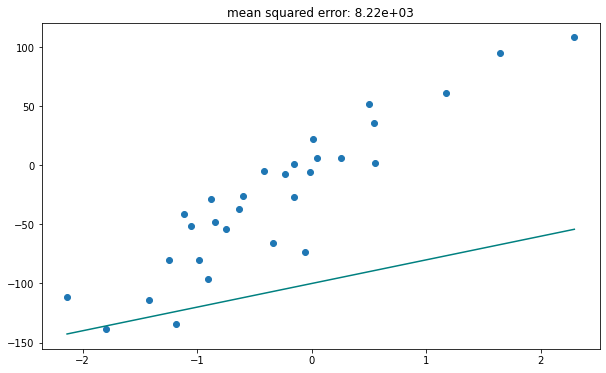

In [6]:
# make a few guesses, see if you can improve your mean squared error (small is better!)
plot_your_guess(m = 20 , c = -100  )

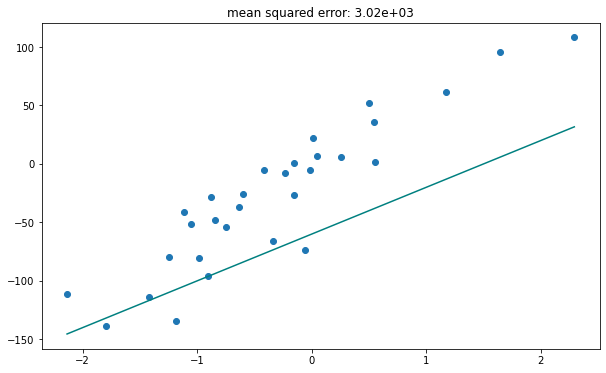

In [7]:
plot_your_guess(m = 40 , c = -60 )

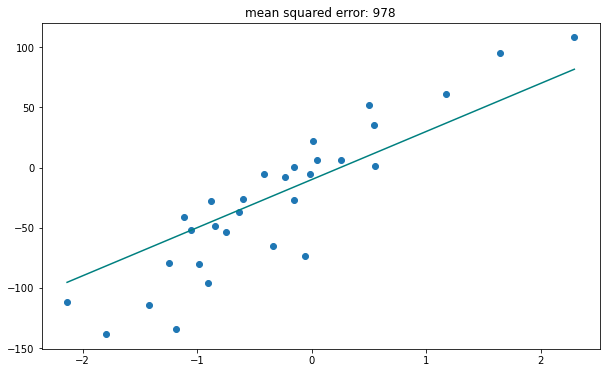

In [8]:
plot_your_guess(m = 40, c = -10  )

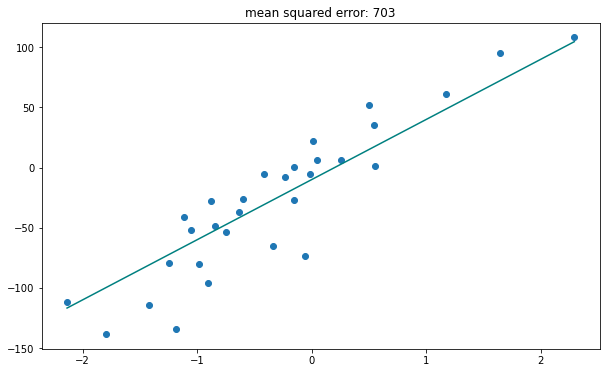

In [9]:
plot_your_guess(m = 50  , c = -10 )

# Linear Regression
Ok, now we'll let the computer "learn" for itself what the best line is.
We'll use the `LinearRegression` model from scikit-learn to do this.

LinearRegression will automatically find the coefficients and intercept terms that best fit the data point.  It will reduce the error as much as possible.

Let's create a linear regression model and fit it to our dataset.

In [10]:
from sklearn.linear_model import LinearRegression

def plot_linear():
    # y_pred's correspondence would be model.predict(X)
    model = LinearRegression()
    model.fit(X,y)
    print ("M :  {}, C : {}".format(model.coef_, model.intercept_))
    y_test = model.predict(X_test.reshape(-1,1))

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten(), y_test)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

M :  [59.15592131], C : -8.259243452985107


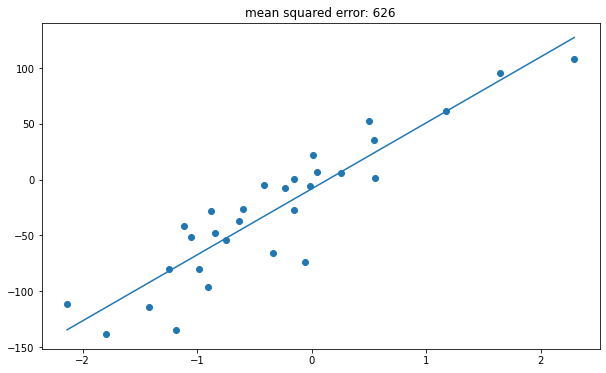

In [11]:
plot_linear()

##  How did your best eye guess compare to linear regression?
### The MSE of my best eye guess is 703 while the machine's is 626. Obviously the machine did better.

# Polynomial Regression

Now let's give our regression model more degrees of freedom.  Can we fit the data better?

How can you tell if the fit is better?

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(degree = 3):
    # make a pipeline that creates the polynomial features based on our input data
    # this is akin to using performing polynomial regression
    # see http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X,y)
    y_test = model.predict(X_test)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten().reshape(-1,1), y_test, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    plt.ylim((min(y)-10,max(y)+10))


### Try adjusting the degree of the polynomial regression.

What happens? 

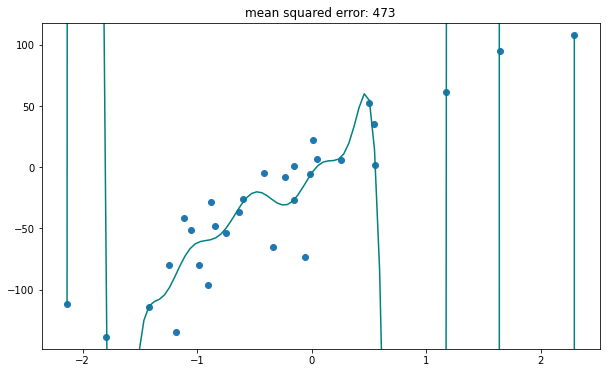

In [13]:
plot_poly(degree = 15)

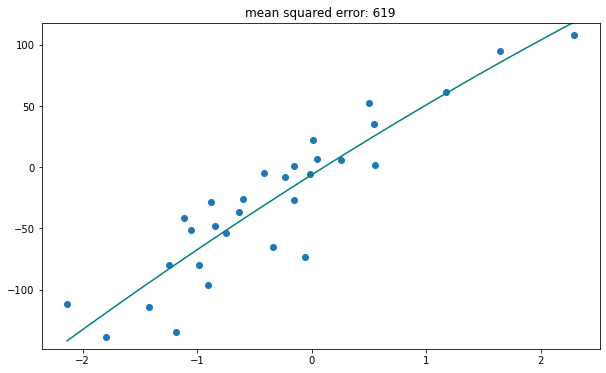

In [19]:
plot_poly(degree = 2)

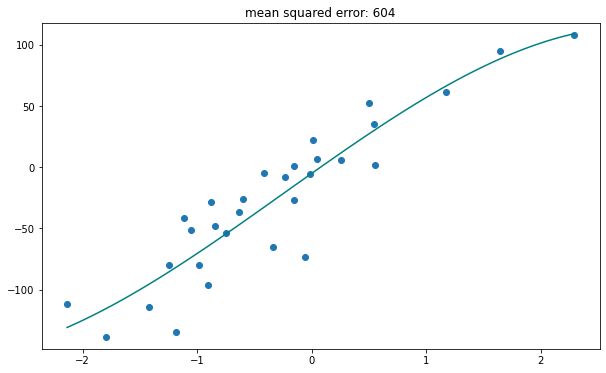

In [14]:
plot_poly(degree = 3)

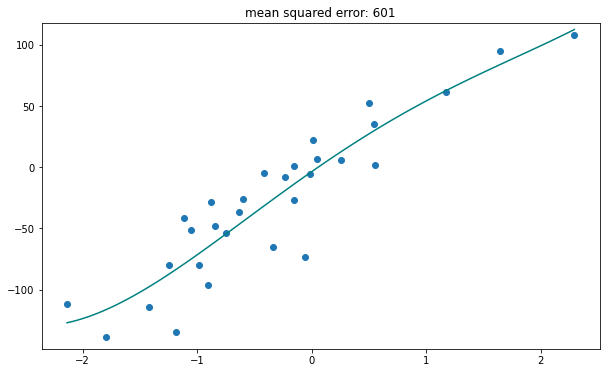

In [15]:
plot_poly(degree = 4)

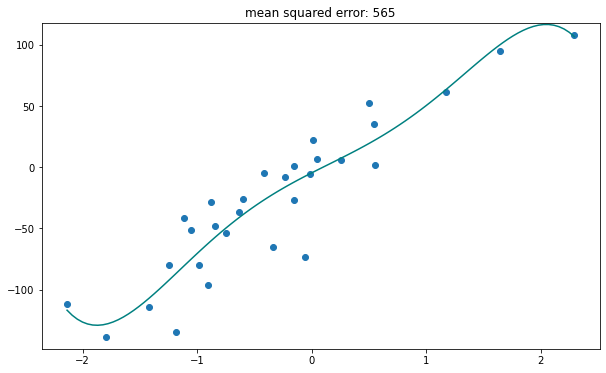

In [16]:
plot_poly(degree = 5)

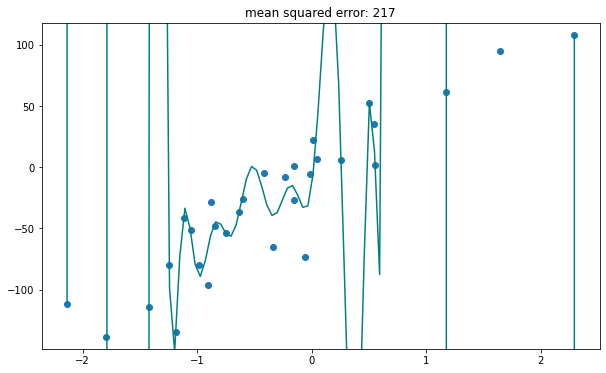

In [17]:
plot_poly(degree = 21)

## Imagine that your boss gave you these data-points as part of a housing dataset.

The task would be to find the function that best predicts new homes, that have never been sold before.

You can imagine that the x-axis is the size of the home, and the y-axis is the price of the home.  Just like I did in the class video.

Assuming this simple toy-world:
What degree of freedom would you choose for your final function?  Why?

**I think the degrees of freedom 3, 4, 5 have very low MSEs and yet account for all the points. Even though the higher DFs have lower MSEs, they seem to treat many points outside a continuous function**